In [1]:
import numpy as np
import scipy.io as sio
import matplotlib.pyplot as plt

data3 = sio.loadmat('ex3data1.mat')
X = data3['X']
y = data3['y']

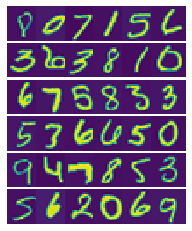

In [2]:
from random import sample
n = 36
l = int(np.sqrt(n))
smpl = sample(range(len(X)),n)
Xs, ys = X[smpl,:], y[smpl]

fig = plt.figure()
fig.subplots_adjust(hspace=0.06, wspace=-0.85)
for i in range (1,n+1):
    ax = fig.add_subplot(l,l,i)
    xs = Xs[i-1].reshape(20,20)
    ax.imshow(xs.T)
    plt.axis('off')
    
plt.show()


In [3]:
from sklearn.linear_model import LogisticRegression as LogReg
from sklearn.model_selection import train_test_split as tts
import time

y = y.ravel()
X_tn,X_ts,y_tn,y_ts = tts(X, y, test_size=0.3, random_state=4)

for solvr in ['lbfgs','sag','saga','newton-cg']:
    t0 = time.time()
    model = LogReg(solver=solvr,max_iter=500,multi_class='multinomial').fit(X_tn,y_tn)
    dur = time.time() - t0
    acc = model.score(X_ts,y_ts)
    print('Solver: %10s   Accurracy: %2.2f   Time_elapse: %2.2fs' %(solvr,acc,dur))

Solver:      lbfgs   Accurracy: 0.91   Time_elapse: 1.34s
Solver:        sag   Accurracy: 0.91   Time_elapse: 5.75s
Solver:       saga   Accurracy: 0.91   Time_elapse: 13.53s
Solver:  newton-cg   Accurracy: 0.91   Time_elapse: 1.36s


Prediction:  [ 6  4  8  5  7  8 10  9  9  7]


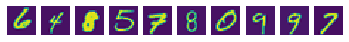

In [4]:
xp = X_ts[55:65]
s = xp.shape[0]
pred = model.predict(xp)
print('Prediction: ',pred)
for i in range(s):
    plt.subplot(1,s,i+1)
    plt.imshow(xp[i].reshape(20,20).T)
    plt.axis('off')


In [5]:
#-------Use Neural Network--------------
from sklearn.neural_network import MLPClassifier

clf = MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(50, 10), random_state=1)
model2 = clf.fit(X_tn,y_tn)


In [6]:
print('Acurracy: %2.2f' %model2.score(X_ts,y_ts))
print('Prediction:',model2.predict(xp))

Acurracy: 0.92
Prediction: [ 6  4  8  5  7  8 10  9  9  7]


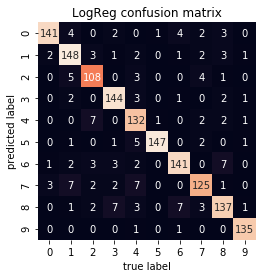

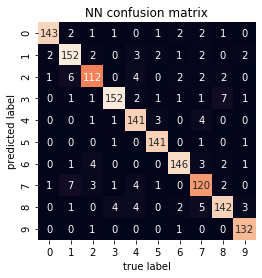

In [10]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

y_pred = model.predict(X_ts)
mat = confusion_matrix(y_ts,y_pred) 
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False)
plt.title('LogReg confusion matrix')
plt.xlabel('true label')
plt.ylabel('predicted label');
plt.show()

y_pred2 = model2.predict(X_ts)
mat2 = confusion_matrix(y_ts,y_pred2) 
sns.heatmap(mat2.T, square=True, annot=True, fmt='d', cbar=False)
plt.title('NN confusion matrix')
plt.xlabel('true label')
plt.ylabel('predicted label');
plt.show()